<a href="https://colab.research.google.com/github/Kubania/Customer-Segmentation-Prediction/blob/master/Group_3_Crop_Yield_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 3 project


## Defining the analytic question

### a. Specifying the research questions
1.	To predict the outcome of the harvest season; whether crops will be alive, damaged by pesticides or damaged by other reasons.
2.	To establish the top factors that determine crop yield.
3.	To find out which crops were most susceptible to damage by pesticides/ damage by other reasons.
4.	To find out which seasons were the best to apply pesticides/To find out whether the season of planting affects the number of insects.
5.	To determine the relationship between soil type and crop damage.
6.	To find out crop yield that had status alive when pesticides were used vs. never used.
7.	To determine whether the number of weeks pesticides were used/ quit affect the crop yield.
8.	To evaluate the optimal doses of pesticides.
9.	To determine the optimal duration of use of pesticides. 


### b. Defining the metrics of success

### c. Understanding the context

###d. Recording the experimental design

###e. Data relevance

## Importing the libraries

In [1]:
# Importing all libraries required for analysis
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
plt.style.use('dark_background')
plt.style.use('bmh')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data

In [2]:
# Loading the data and previewing the first 5 rows 
df = pd.read_csv('train.csv')

df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


## Checking the data

In [4]:
# Checking the shape of our data
df.shape


(88858, 10)

Our data has 88,858 rows and 10 columns

In [5]:
# Checking for infomation about a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


Our data has no null values, except in Number_Weeks_Used column

The datatypes include integers, objects and float

In [6]:
# Checking summary statistics of our data

df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


## Cleaning the dataset


In [7]:
# We start by checking for missing values
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

Our output indicates that there are no missing values expect in the Number_Weeks_Used column which has 9000 missing values


In [8]:
#predicting missing values using the InterativeImputer from the fancyinpute library
# we need to remove categorical columns

df_new = df.drop(['ID'], axis=1)

from fancyimpute import IterativeImputer as MICE

data_fit = pd.DataFrame(MICE().fit_transform(df_new))

data_fit.head()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0

,0,1,2,3,4,5,6,7,8
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [9]:
# previewing the new data
data_fit.head()

,0,1,2,3,4,5,6,7,8
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [10]:
# renaming the columns

data_fit = data_fit.set_axis(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 
                   'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season', 'Crop_Damage'], axis=1, inplace=False)

data_fit.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [11]:
data_fit.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [12]:
# checking for duplicates
data_fit.duplicated().sum()


1243

In [13]:
# removing the duplicates
data_fit.drop_duplicates(inplace=True)

In [14]:
# check for duplicates
data_fit.duplicated().any()

False

In [15]:
# check for number of records left
data_fit.shape

(87615, 9)

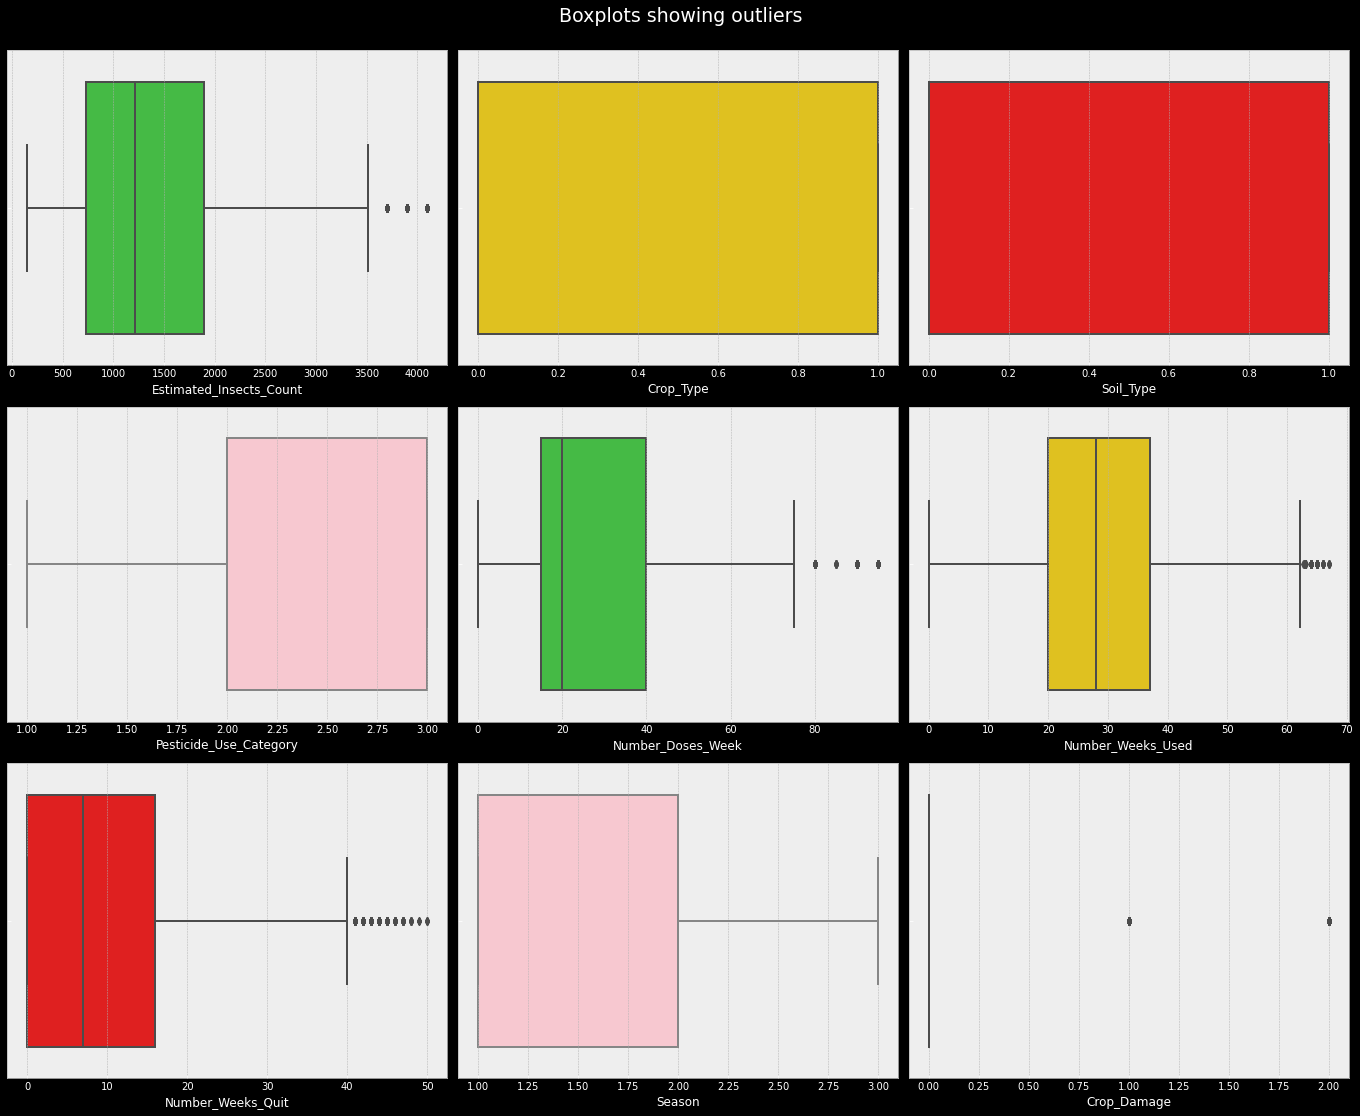

In [16]:
# checking for outliers
# checking for outliers
plt.style.use('dark_background')
plt.style.use('bmh')
fig, axes = plt.subplots(nrows =3, ncols = 3, figsize = (19, 15))
colors = ['limegreen', 'gold', 'red', 'pink','limegreen', 'gold', 'red', 'pink','limegreen']
columns = data_fit.columns
plt.suptitle('Boxplots showing outliers', y = 1.03, fontsize = 19)
for ax, data, column , color in zip(axes.flatten(), data_fit, columns, colors):
    sns.boxplot(data_fit[column], ax = ax, color = color)
plt.tight_layout()

In [17]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [18]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in data_fit:
    rows, columns = data_fit.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(data_fit[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

Estimated_Insects_Count has 352 outliers in total, which is 0.4% of data
Crop_Type has 0 outliers in total, which is 0.0% of data
Soil_Type has 0 outliers in total, which is 0.0% of data
Pesticide_Use_Category has 0 outliers in total, which is 0.0% of data
Number_Doses_Week has 857 outliers in total, which is 0.98% of data
Number_Weeks_Used has 56 outliers in total, which is 0.064% of data
Number_Weeks_Quit has 476 outliers in total, which is 0.54% of data
Season has 0 outliers in total, which is 0.0% of data
Crop_Damage has 2252 outliers in total, which is 2.6% of data


In [19]:
data_fit['Crop_Damage'].value_counts()

0.0    73617
1.0    11746
2.0     2252
Name: Crop_Damage, dtype: int64

In [20]:
# Export the cleaned data

data_fit.to_csv("crop_cleaned.csv")

## Exploratory Data Analysis

In [21]:
# Loading the cleaned dataset

crop_cleaned = pd.read_csv('/content/crop_cleaned.csv')

crop_cleaned.head()

,Unnamed: 0,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [22]:
# Droping the unnamed column

crop_cleaned = crop_cleaned.drop(['Unnamed: 0'], axis=1)

crop_cleaned.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [23]:
# Getting a summary of out dataset
crop_cleaned.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,87615.000000,87615.000000,87615.000000,87615.000000,87615.000000,87615.000000,87615.000000,87615.000000,87615.000000
mean,1398.714147,0.283661,0.458609,2.262135,25.930377,28.587824,9.668504,1.897255,0.185471
std,849.668444,0.450777,0.498287,0.456831,15.567698,12.073968,9.909235,0.702687,0.449978
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


## Univariate EDA

### Histograms for Numerical Variables

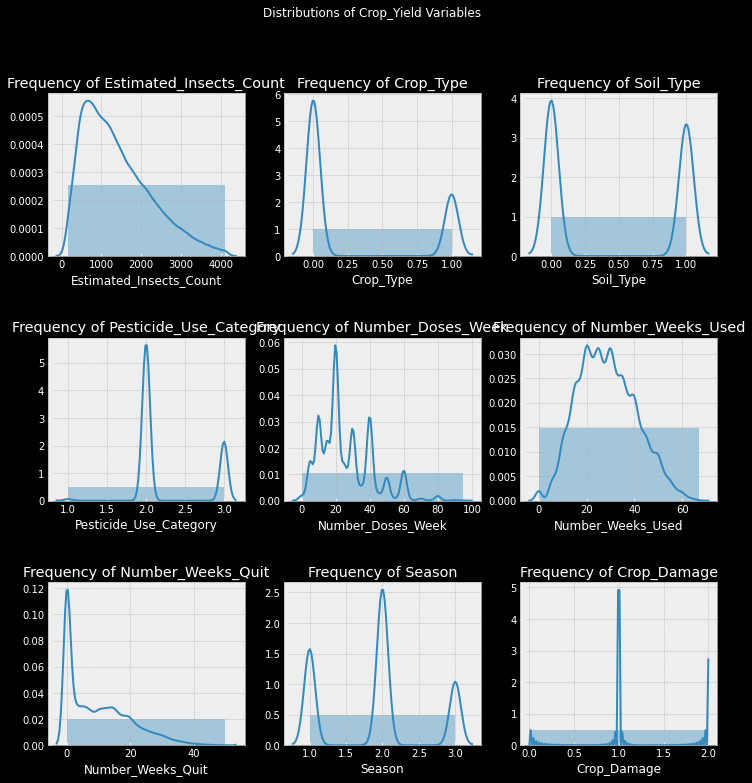

In [24]:
# Frequency distribution
plt.style.use('dark_background')
plt.style.use('bmh')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Crop_Yield Variables')

for ax, values, name in zip(axes.flatten(), crop_cleaned.values.T, crop_cleaned.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(crop_cleaned.values.T[1]))//2)
    ax.set(title="Frequency of {}".format(name), xlabel=name)

As we can see from our histograms we have Number of Weeks Quit and Estimated Insect Count being positively skewed

In the other columns we have multimodal histogram curves where we see the most frequencies

### The Distribution of our Categorical Columns

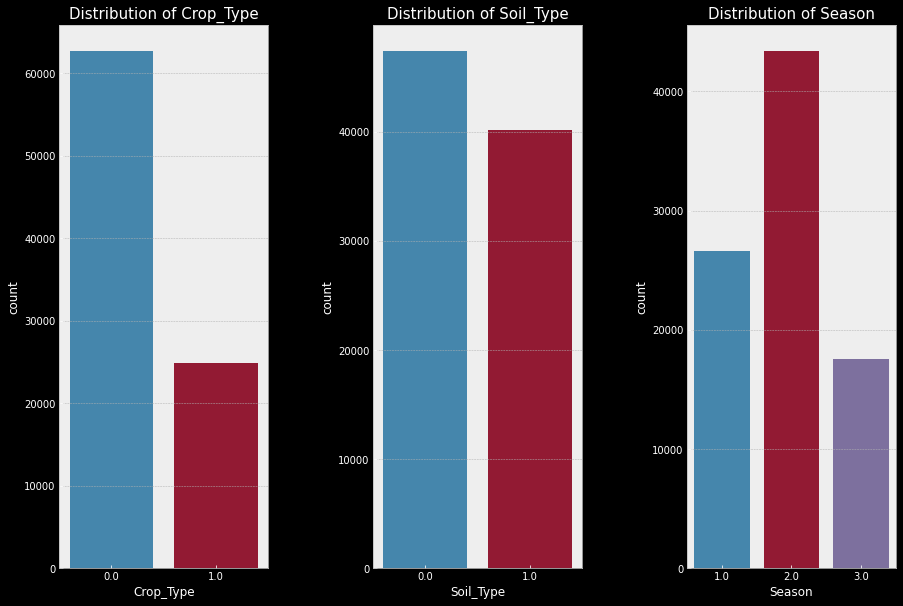

In [25]:
# Check the Distribution of our categorical columns
fig, axes = plt.subplots(nrows= 1, ncols=3, figsize=(15, 10))

cols = ["Crop_Type","Soil_Type", "Season"]

for ax, data, i in zip(axes.flatten(), crop_cleaned, cols):
  sns.countplot(crop_cleaned[i], ax=ax)
  ax.set_title("Distribution of {}".format(i), fontsize = 15)

plt.subplots_adjust(wspace=0.5)


([<matplotlib.axis.XTick at 0x7fbacb961860>,
 [Text(0, 0, 'Never'),
  Text(0, 0, 'Previously Used'),
  Text(0, 0, 'Currently Using')])

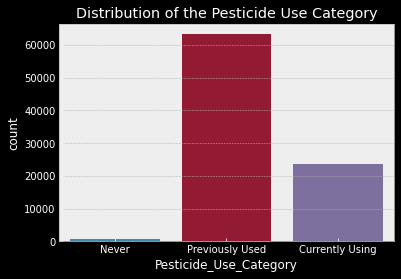

In [26]:
# Distribution of the Pesticide Use Category
sns.countplot(crop_cleaned['Pesticide_Use_Category'])
plt.title('Distribution of the Pesticide Use Category')
plt.xticks(ticks=[0,1,2], labels=['Never','Previously Used','Currently Using'])

([<matplotlib.axis.XTick at 0x7fbacb8c1c88>,
 [Text(0, 0, 'Alive'),
  Text(0, 0, 'Damaged Other Cases'),
  Text(0, 0, 'Damage Pestcides')])

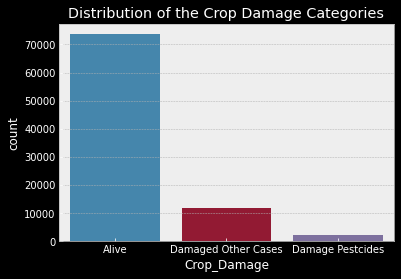

In [27]:
# Distribution of the Crop Damage
sns.countplot(crop_cleaned['Crop_Damage'])
plt.title('Distribution of the Crop Damage Categories')
plt.xticks(ticks=[0,1,2], labels=['Alive','Damaged Other Cases','Damage Pestcides'])

From the Distribution of the Categorical variables we see that

Crop_Type : that Crop Type 0 has more yields compared to crop type 1

Soil_Type: that Soil Type 0 had more yields coming out of it compared to Soil Type 1 but the difference was not very huge

Seasons: Season 2 recorded the highest yields followed by season 1 then 3

Pesticide_Use_Category: most of the yields had pesticides being previously used and Currently using, very few yields never had pesticides used

Crop Damage: Most of the crops were alive they never experienced damaged to the point that crops that experienced damage because of pesticides are seen as outliers.
Therefore since this is our target class we have imbalanced data, an issue that will be dealt with during modelling 





### Research Question 3: Which crops were most susceptible to damage by pesticides/ damage by other reasons.

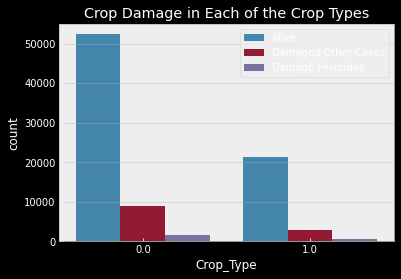

In [28]:
sns.countplot(crop_cleaned['Crop_Type'], hue=crop_cleaned['Crop_Damage'])
plt.title("Crop Damage in Each of the Crop Types")
plt.legend(loc='upper right', labels=['Alive','Damaged Other Cases','Damage Pestcides'])
plt.show()

Text(0.5, 1.0, 'Percentage Distribution of Crop Damage Type in Crop Type 0')

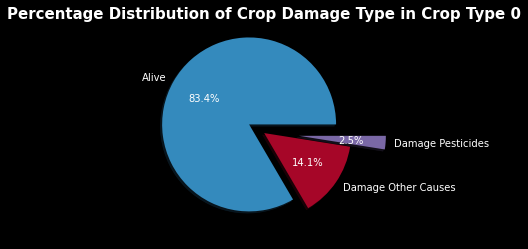

In [29]:
# Percentage Distribution of Crop Damage in Crop Type 0
crop_0 = crop_cleaned[crop_cleaned['Crop_Type'] == 0.0]

types = crop_0.groupby("Crop_Damage").Crop_Type.count()
label = ["Alive", "Damage Other Causes", "Damage Pesticides"]
explode = (0.2, 0,0.4)

plt.pie(types, explode=explode, labels=label,autopct= '%1.1f%%',shadow = True)
plt.title("Percentage Distribution of Crop Damage Type in Crop Type 0", fontweight="bold", fontsize=15)


Text(0.5, 1.0, 'Percentage Distribution of Crop Damage Type in Crop Type 1')

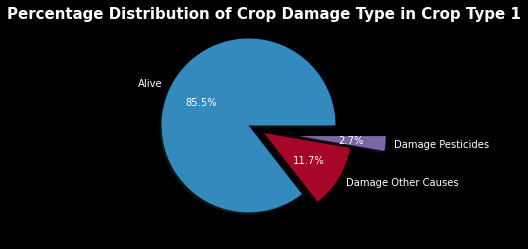

In [30]:
# Percentage Distribution of Crop Damage in Crop Type 1

crop_1 = crop_cleaned[crop_cleaned['Crop_Type'] == 1.0]

types = crop_1.groupby("Crop_Damage").Crop_Type.count()
label = ["Alive", "Damage Other Causes", "Damage Pesticides"]
explode = (0.2, 0,0.4)

plt.pie(types, explode=explode, labels=label,autopct= '%1.1f%%',shadow = True)
plt.title("Percentage Distribution of Crop Damage Type in Crop Type 1", fontweight="bold", fontsize=15)

From our research question we see that Crop Type 0 had more crops Damaged due to other causes and pesticides compared to Crop Type 1, however from our pie charts we see the percentages of status Alive, Damaged due to Other Causes and Damage due to pesticides being almost equal.

Crop Type 0 experienced 17% damage 
Crop Type 1 experienced 15.1% damage


This tells us that we can't conclude that Crop Type 0 is most susceptible to Crop Damage compared to Crop Type 1 because of the difference in Yields that we see Crop Type 0 and 1 having.

We can therefore carry out an Hypothesis test to see if there is a statistical difference between the Crop Type 0 yields and Crop Type 1 yields
.

### Research Question 4 (a): Which seasons were the best to apply pesticides.

Text(0, 0.5, 'Total Estimated Insect Count (per Sq. Ft)')

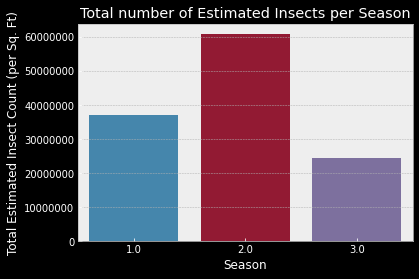

In [31]:
# Look at Total number of Insects per season

insect_count = crop_cleaned['Estimated_Insects_Count'].groupby(crop_cleaned['Season']).sum()
insect_count

sns.barplot(x = insect_count.index, y = insect_count.values,)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Total number of Estimated Insects per Season")
plt.ylabel("Total Estimated Insect Count (per Sq. Ft)")


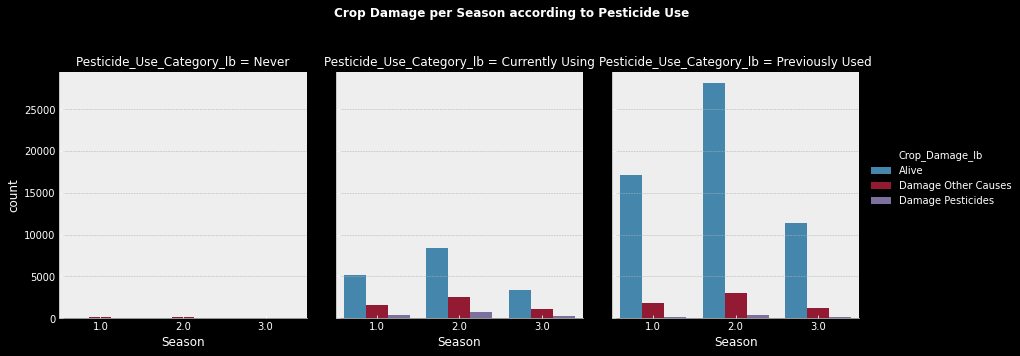

In [32]:
# Which Season used Pestcides the most

# Labeled columns
crop_cleaned["Crop_Damage_lb"] = crop_cleaned['Crop_Damage'].replace({0:"Alive",1:"Damage Other Causes",2:"Damage Pesticides"})
crop_cleaned["Pesticide_Use_Category_lb"] = crop_cleaned['Pesticide_Use_Category'].replace({1:"Never",2:"Previously Used",3:"Currently Using"})

season_pest = sns.catplot(x='Season', hue = 'Crop_Damage_lb',col='Pesticide_Use_Category_lb',data=crop_cleaned, kind="count",height=5, aspect=.8)
plt.suptitle("Crop Damage per Season according to Pesticide Use", fontsize=12,fontweight='bold')
plt.subplots_adjust(top=.8)

We see that Season 2 had the highest Estimated insect count, and from our Facet Grids we see that when Pesticides have been Previously Used had more Yields in all seasons Season 2 having the highest yields  followed by season 1 then 3

In the category Currently Using the crop damage due to pesticides is high compared to category Never and Previously Used in Season 2

### Research Question 4 (b): To find out whether the season of planting affects the number of insects as well as the pesticides used.

In [33]:
#To find out whether the season of planting affects the number of insects as well as the pesticides used.

insect = crop_cleaned.groupby('Season').sum()['Estimated_Insects_Count'].reset_index(False).sort_values(by='Estimated_Insects_Count', ascending=False)

insect.style.background_gradient(cmap='YlOrBr')

,Season,Estimated_Insects_Count
1,2.000000,60848477.000000
0,1.000000,37083344.000000
2,3.000000,24616519.000000


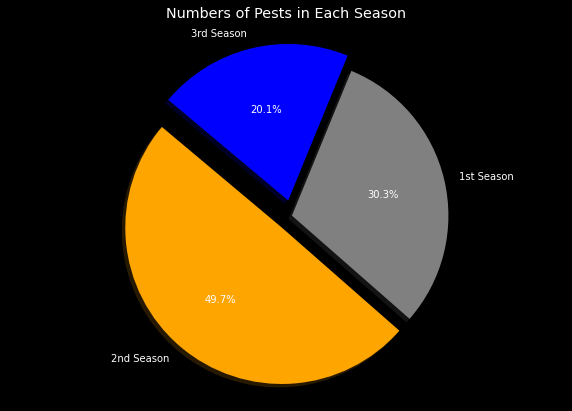

In [34]:
# Pie-chart representing the number of insecticides in each season
counts = insect['Estimated_Insects_Count'].values.tolist()

labels = ['2nd Season', '1st Season', '3rd Season']

colors = ['orange','grey','blue']

# Highlights a particular Value in plot
explode = (0.1, 0, 0.1)  

# Plotting our pie chart

plt.figure(figsize=(10,7))
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Numbers of Pests in Each Season')
plt.show()

> In this question the goal was to investigage the distribution of insects in each season. This is what the data reveals:
* The second season has the largest count of insects with 49.7 percent of the insects in all the seasons. This means that use of insecticides sould be more in this season.
* The 1st season had the second largest count of insects with 30.3%.
* Third season had only 20.1 percent of all the insects. This means that the amount of pesticides used should be less for this period. 


### Research Question 5: To determing the relationship between Soil_type and Crop_Damage.

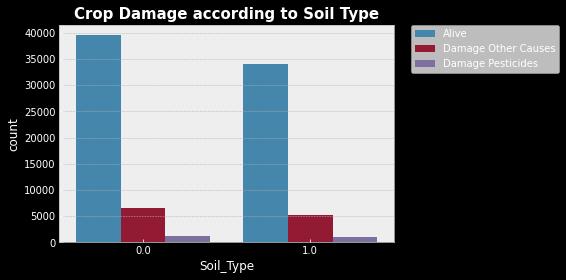

In [35]:
sns.countplot(x="Soil_Type", hue="Crop_Damage", data=crop_cleaned)
plt.title("Crop Damage according to Soil Type",fontweight="bold", fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=["Alive", "Damage Other Causes", "Damage Pesticides"])

Text(0.5, 1.0, 'Percentage Distribution of Crop Damage Type in Soil Type 0')

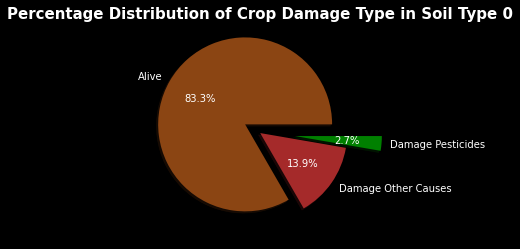

In [36]:
# Percentage Distribution of Crop Damage in Soil Type 0
soil_0 = crop_cleaned[crop_cleaned['Soil_Type'] == 0.0]

types = soil_0.groupby("Crop_Damage").Soil_Type.count()
label = ["Alive", "Damage Other Causes", "Damage Pesticides"]
colors = ["saddlebrown","brown","green"]
explode = (0.2, 0,0.4)


plt.pie(types, explode=explode, labels=label,autopct= '%1.1f%%',colors=colors,shadow = True)
plt.title("Percentage Distribution of Crop Damage Type in Soil Type 0", fontweight="bold", fontsize=15)

Text(0.5, 1.0, 'Percentage Distribution of Crop Damage Type in Soil Type 0')

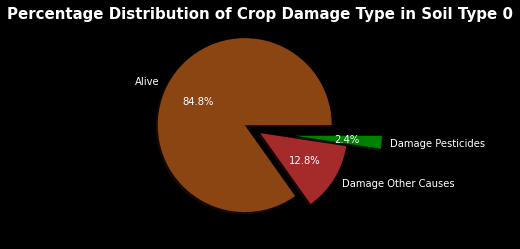

In [37]:
# Percentage Distribution of Crop Damage in Soil Type 0
soil_1 = crop_cleaned[crop_cleaned['Soil_Type'] == 1.0]

types = soil_1.groupby("Crop_Damage").Soil_Type.count()
label = ["Alive", "Damage Other Causes", "Damage Pesticides"]
explode = (0.2, 0,0.4)
colors = ["saddlebrown","brown","green"]

plt.pie(types, explode=explode, labels=label,autopct= '%1.1f%%',colors=colors,shadow = True)
plt.title("Percentage Distribution of Crop Damage Type in Soil Type 0", fontweight="bold", fontsize=15)

Text(0.5, 1.0, 'Correlation between Soil Type and Crop Damage')

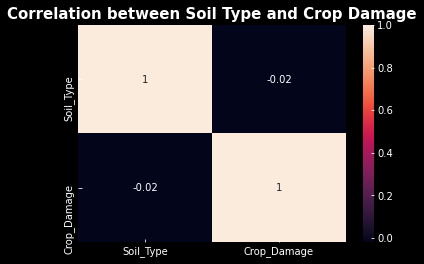

In [38]:
crop_soil = crop_cleaned[["Soil_Type","Crop_Damage"]]

sns.heatmap(crop_soil.corr(), annot=True)
plt.title("Correlation between Soil Type and Crop Damage", fontsize=15, fontweight='bold')

From our research question we were looking if there is a relationship between Soil Type and Crop Damage.

From our bar plot wee see that Soil Type 0 had more yields being Alive and Damaged as well compared to Soil Type 1 but upon further investigation we see the percentage differences have a slight difference.
Soil Type 0 had more yields compared to soil Type 1 but the percentages of crop damage from each Soil Type is have a slight difference.

Then a correlation between the was also done showing no significant correlation between Soil Type and Crop Damage.

Therefore concluding that there is no relationship between the two

[italicized text](https:// [link text](https://))### To determine crop yields that experience damage when pesticides are used frequently

### Research Question 6: To find out crop yield that had status alive when pesticides were used vs. never used.

In [39]:
#To find out crop yield that had status alive when pesticides were used vs. never used.
# 0 = alive, 1 = damaged due to other causes, 2 = damage due to pesticides
# Pesticide use category : 1 = Never, 2 = Previously used, 3 = Currently using

# First we select the crops where crop_damage status was alive

pest_alive = crop_cleaned.loc[crop_cleaned['Crop_Damage'] == 0]

alive = pest_alive.groupby('Pesticide_Use_Category').count()['Crop_Damage'].reset_index(False).sort_values(by='Crop_Damage', ascending=False)

alive.style.background_gradient(cmap='Accent')

,Pesticide_Use_Category,Crop_Damage
1,2.000000,56596
2,3.000000,16908
0,1.000000,113


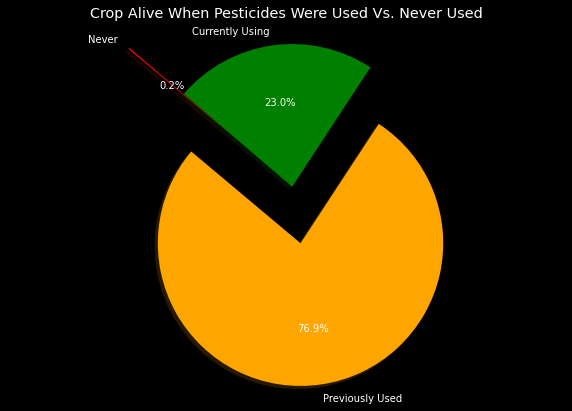

In [40]:
# Pie-chart representation of crop yield with status alive when pesticides were used vs. never used.
counts = alive['Crop_Damage'].values.tolist()

labels = ['Previously Used', 'Currently Using', 'Never']

colors = ['orange','green','red']

# Highlights a particular Value in plot
explode = (0.4, 0, 0.5)  

# Plotting our pie chart


plt.figure(figsize=(10,7))
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Crop Alive When Pesticides Were Used Vs. Never Used')
plt.show()

>> * Based on our analysis, when pesticides were never used, only 118 crop yields were alive. This represents 0.2 percent of all the crop yields that were alive.
* The crops that were alive when farmers were currently using pesticides is 17,162. This represents 23.1 percent of all the crop yields. 
* The crops that were alive when farmers had previously used pesticides is 56,958. This represents 76.7 percent of all the crop yields.
* To answer our research question, there are significantly more crops alive when pesticides are currently being used than when pesticides have never been used. 
* Another observation worth noting is that the farmers who previously used pesticides but were not currently using pesticides had significantly more crops that were alive. 
* This could be an indication that continous use of pesticides may have a negative effect on crop yields.

### Research Question 7: To determine whether the number of weeks pesticides used /quit affects crop yield

In [41]:
#Plot number of weeks used and number of weeks quit. 
used = crop_cleaned['Number_Weeks_Used']
quit = crop_cleaned['Number_Weeks_Quit']

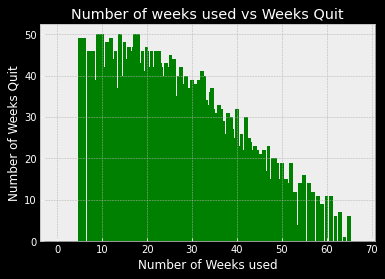

In [42]:
plt.bar(used,quit,color = 'green')
plt.xlabel("Number of Weeks used")
plt.ylabel("Number of Weeks Quit")
plt.title("Number of weeks used vs Weeks Quit")
plt.show()

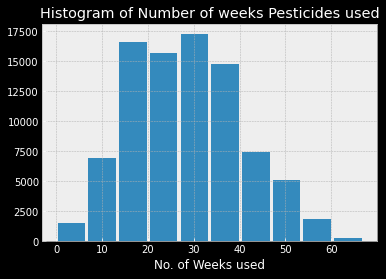

In [43]:
#Frequency of Number of weeks used

damage= crop_cleaned['Crop_Damage']

plt.hist(used, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No. of Weeks used')
plt.ylabel('')
plt.title('Histogram of Number of weeks Pesticides used')
plt.show()

Text(0, 0.5, 'Total Number of weeks')

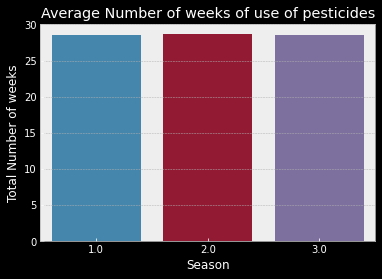

In [44]:
#Max Weeks
avgweek = crop_cleaned['Number_Weeks_Used'].groupby(crop_cleaned['Season']).mean()
avgweek
sns.barplot(x= avgweek.index, y=avgweek.values)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Average Number of weeks of use of pesticides")
plt.ylabel('Total Number of weeks')

From the analysis above,we found out the following: 
1. the most frequent number of weeks of pesticides use was between 15- 20 and at 3 weeks 
2. The average number of weeks for the use of pesticides does not change between the seasons

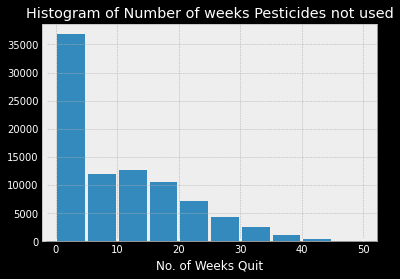

In [45]:
#Frequency of of weeks at which farmers quit use of pesticides
plt.hist(quit, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No. of Weeks Quit')
plt.ylabel('')
plt.title('Histogram of Number of weeks Pesticides not used')
plt.show()

Text(0, 0.5, 'Total Number of weeks')

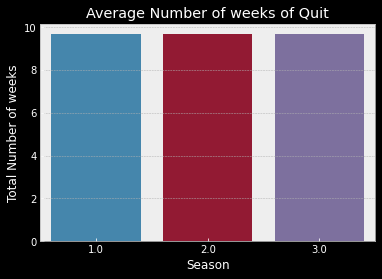

In [46]:
#Max Weeks
avgweekquit = crop_cleaned['Number_Weeks_Quit'].groupby(crop_cleaned['Season']).mean()
avgweekquit
sns.barplot(x= avgweekquit.index, y=avgweekquit.values)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Average Number of weeks of Quit")
plt.ylabel('Total Number of weeks')

1. We also note that the farmers quit use of pesticides after the first five weeks of use. This means that the effects of pesticides show as soon as week 5 of use. 

2. On average farmers quit use of pesticide at week 9 across seasons. 

### Research Question 8: To evaluate optimal doses of pesticides


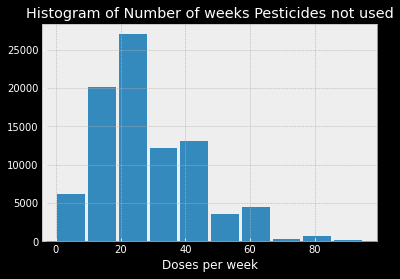

In [47]:
#Create a new column for doses per season
doses = crop_cleaned['Number_Doses_Week']
plt.hist(doses, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Doses per week')
plt.ylabel('')
plt.title('Histogram of Number of weeks Pesticides not used')
plt.show()

Text(0, 0.5, 'Total Doses ')

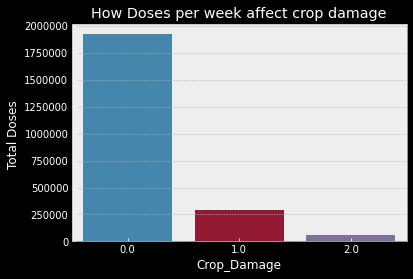

In [48]:
## Do a plot of How doses affect crop damage
dosescount_damage = crop_cleaned['Number_Doses_Week'].groupby(crop_cleaned['Crop_Damage']).sum()
dosescount_damage

sns.barplot(x= dosescount_damage.index, y=dosescount_damage.values)
plt.ticklabel_format(style='plain', axis='y')
plt.title("How Doses per week affect crop damage")
plt.ylabel('Total Doses ')

Text(0, 0.5, 'Total Doses ')

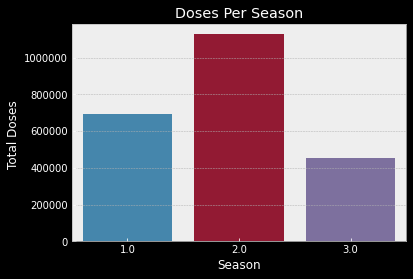

In [49]:
# Doses count by season
dosescount = crop_cleaned['Number_Doses_Week'].groupby(crop_cleaned['Season']).sum()
dosescount

sns.barplot(x= dosescount.index, y=dosescount.values)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Doses Per Season")
plt.ylabel('Total Doses ')

From the analysis above, we can conclude that 
1. The higher the pesticides doses per week the better the chances of survival for the crops. 
2. Number of doses in season 2 significantly increase compared to season 1 and 3.


### Research Question 9: To evaluate optimal doses of pesticides used

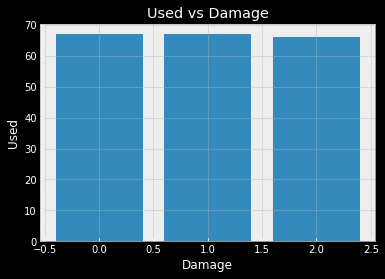

In [50]:
#Plot of Used weeks vs Crop Damage to determine affect of Weeks of Pesticides used on crop damage
plt.bar(damage,used)
plt.title("Used vs Damage")
plt.xlabel("Damage")
plt.ylabel("Used")
plt.show()

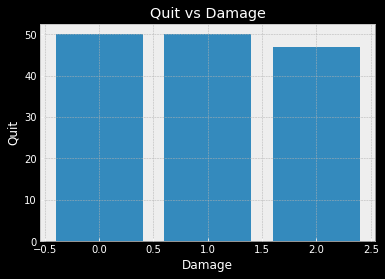

In [51]:
#Plot of Used weeks vs Crop Damage to determine Weeks of Pesticides quit
plt.bar(damage,quit)
plt.title("Quit vs Damage")
plt.xlabel("Damage")
plt.ylabel("Quit")
plt.show()

## Checking for Correlation & Multicolinearity

In [52]:
# Correlation matrix for out variables
corr = crop_cleaned.iloc[:, :-1].corr()
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.089259,-0.055507,-0.081549,-0.101944,0.445447,0.303134,0.002378,0.202276
Crop_Type,-0.089259,1.000000,-0.290342,0.242883,-0.190396,-0.042511,-0.233520,0.002037,-0.018822
Soil_Type,-0.055507,-0.290342,1.000000,0.034704,0.080008,-0.068685,0.008767,0.002327,-0.020076
Pesticide_Use_Category,-0.081549,0.242883,0.034704,1.000000,-0.009859,0.337101,-0.559880,0.002515,0.176971
Number_Doses_Week,-0.101944,-0.190396,0.080008,-0.009859,1.000000,0.124271,-0.041644,-0.002029,-0.024161
Number_Weeks_Used,0.445447,-0.042511,-0.068685,0.337101,0.124271,1.000000,-0.462340,0.004006,0.238664
Number_Weeks_Quit,0.303134,-0.233520,0.008767,-0.559880,-0.041644,-0.462340,1.000000,0.000062,-0.123976
Season,0.002378,0.002037,0.002327,0.002515,-0.002029,0.004006,0.000062,1.000000,0.000744
Crop_Damage,0.202276,-0.018822,-0.020076,0.176971,-0.024161,0.238664,-0.123976,0.000744,1.000000


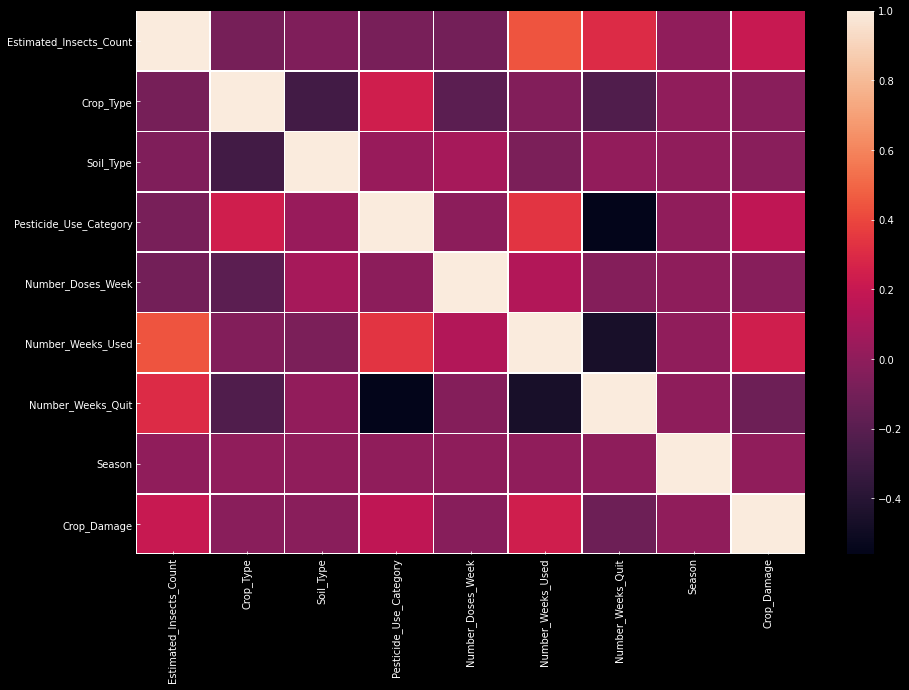

In [53]:
# Plot a heatmap.

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.5,ax=ax)
plt.show()

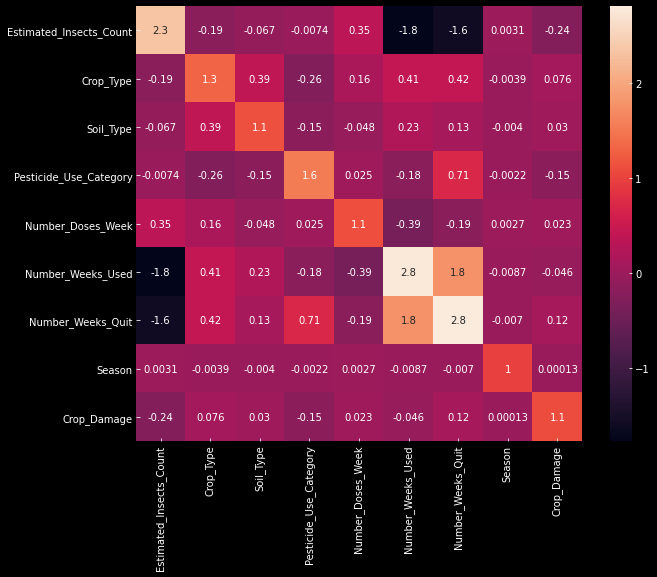

In [54]:
# Getting the vif

vif_train = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

plt.figure(figsize = (10,8))

sns.heatmap(vif_train, annot = True)

> * From the correlation heatmap, we have established that there is no correlation between our features.
* The VIF heatmap also reveals that there is no multicolinarity in our features.
* This means that our features are appropriate and ready for modelling.